Ronan Jasper G. Reponte
# CIA Country Analysis and Clustering


Source: All these data sets are made up of data from the US government. 
https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html

## Goal: 

### Gain insights into similarity between countries and regions of the world by experimenting with K-Means Cluster
ing
----

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.express as px
from sklearn.cluster import KMeans
from kneed import KneeLocator,KneeLocator
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv("cia_factbook.csv", sep=',', header=0)
df

,country,area,birth_rate,death_rate,infant_mortality_rate,internet_users,life_exp_at_birth,maternal_mortality_rate,net_migration_rate,population,population_growth_rate
0,Russia,17098242.0,11.87,13.83,7.08,40853000.0,70.16,34.0,1.69,1.424703e+08,-0.03
1,Canada,9984670.0,10.29,8.31,4.71,26960000.0,81.67,12.0,5.66,3.483484e+07,0.76
2,United States,9826675.0,13.42,8.15,6.17,245000000.0,79.56,21.0,2.45,3.188921e+08,0.77
3,China,9596960.0,12.17,7.44,14.79,389000000.0,75.15,37.0,-0.32,1.355693e+09,0.44
4,Brazil,8514877.0,14.72,6.54,19.21,75982000.0,73.28,56.0,-0.15,2.026568e+08,0.80
...,...,...,...,...,...,...,...,...,...,...,...
254,Bouvet Island,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255,Palmyra Atoll,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,Akrotiri,123.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
257,European Union,NaN,NaN,NaN,4.33,NaN,80.02,NaN,NaN,5.114348e+08,NaN


## 1. Perform Exploratory Data Analysis

In [3]:
# Display basic information about the dataset
print(df.info())

# Display basic statistical details of the dataset
print(df.describe())

# Display the column names
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  259 non-null    object 
 1   area                     257 non-null    float64
 2   birth_rate               224 non-null    float64
 3   death_rate               225 non-null    float64
 4   infant_mortality_rate    224 non-null    float64
 5   internet_users           213 non-null    float64
 6   life_exp_at_birth        224 non-null    float64
 7   maternal_mortality_rate  184 non-null    float64
 8   net_migration_rate       222 non-null    float64
 9   population               238 non-null    float64
 10  population_growth_rate   233 non-null    float64
dtypes: float64(10), object(1)
memory usage: 22.4+ KB
None
               area  birth_rate  death_rate  infant_mortality_rate  \
count  2.570000e+02  224.000000  225.000000             224.0000

In [7]:
# Check for missing values
print(df.isnull().sum())

country                     0
area                        2
birth_rate                 35
death_rate                 34
infant_mortality_rate      35
internet_users             46
life_exp_at_birth          35
maternal_mortality_rate    75
net_migration_rate         37
population                 21
population_growth_rate     26
dtype: int64


## 2. Feature Engineering for Missing Data
**TASK: What countries have NaN for Agriculture? What is the main aspect of these countries?**
**TASK: Notice climate is missing for a few countries, but not the Region! Let's use this to our advantage. Fill in the missing Climate values based on the mean climate value for its region.**

Hints on how to do this: https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-gro <br>
Since Agriculture, Climate and Region are not features of the dataset. The following is performed instead: <br>u**TASK:Use the same method for the missing values in Literacy.**p


In [9]:
imputer = SimpleImputer(strategy='mean')
# Fill missing values with the mean value grouped by 'name'
columns_with_missing_values = [
    'area', 'birth_rate', 'death_rate', 'infant_mortality_rate', 
    'internet_users', 'life_exp_at_birth', 'maternal_mortality_rate', 
    'net_migration_rate', 'population', 'population_growth_rate'
]

for column in columns_with_missing_values:
    df[column] = df[column].fillna(df.groupby('country')[column].transform('mean'))

# Check if there are still missing values
missing_values = df.isnull().sum()
print("Missing values after group mean filling:")
print(missing_values)

# Fill remaining NaNs with the overall mean of the column
for column in columns_with_missing_values:
    df[column] = df[column].fillna(df[column].mean())

# Check if there are still missing values
missing_values = df.isnull().sum()
print("Missing values after overall mean filling:")
print(missing_values)

Missing values after group mean filling:
country                     0
area                        2
birth_rate                 35
death_rate                 34
infant_mortality_rate      35
internet_users             46
life_exp_at_birth          35
maternal_mortality_rate    75
net_migration_rate         37
population                 21
population_growth_rate     26
dtype: int64
Missing values after overall mean filling:
country                    0
area                       0
birth_rate                 0
death_rate                 0
infant_mortality_rate      0
internet_users             0
life_exp_at_birth          0
maternal_mortality_rate    0
net_migration_rate         0
population                 0
population_growth_rate     0
dtype: int64


In [10]:
df.head()

,country,area,birth_rate,death_rate,infant_mortality_rate,internet_users,life_exp_at_birth,maternal_mortality_rate,net_migration_rate,population,population_growth_rate
0,Russia,17098242.0,11.87,13.83,7.08,40853000.0,70.16,34.0,1.69,1.424703e+08,-0.03
1,Canada,9984670.0,10.29,8.31,4.71,26960000.0,81.67,12.0,5.66,3.483484e+07,0.76
2,United States,9826675.0,13.42,8.15,6.17,245000000.0,79.56,21.0,2.45,3.188921e+08,0.77
3,China,9596960.0,12.17,7.44,14.79,389000000.0,75.15,37.0,-0.32,1.355693e+09,0.44
4,Brazil,8514877.0,14.72,6.54,19.21,75982000.0,73.28,56.0,-0.15,2.026568e+08,0.80


# 3. Data Feature Preparation

**TASK: Create a dummy variable to all categorical data.**

In [11]:
X = pd.get_dummies(df)
X.head()

,area,birth_rate,death_rate,infant_mortality_rate,internet_users,life_exp_at_birth,maternal_mortality_rate,net_migration_rate,population,population_growth_rate,...,country_Venezuela,country_Vietnam,country_Virgin Islands,country_Wake Island,country_Wallis and Futuna,country_West Bank,country_Western Sahara,country_Yemen,country_Zambia,country_Zimbabwe
0,17098242.0,11.87,13.83,7.08,40853000.0,70.16,34.0,1.69,1.424703e+08,-0.03,...,False,False,False,False,False,False,False,False,False,False
1,9984670.0,10.29,8.31,4.71,26960000.0,81.67,12.0,5.66,3.483484e+07,0.76,...,False,False,False,False,False,False,False,False,False,False
2,9826675.0,13.42,8.15,6.17,245000000.0,79.56,21.0,2.45,3.188921e+08,0.77,...,False,False,False,False,False,False,False,False,False,False
3,9596960.0,12.17,7.44,14.79,389000000.0,75.15,37.0,-0.32,1.355693e+09,0.44,...,False,False,False,False,False,False,False,False,False,False
4,8514877.0,14.72,6.54,19.21,75982000.0,73.28,56.0,-0.15,2.026568e+08,0.80,...,False,False,False,False,False,False,False,False,False,False


**TASK: For numerical data perform standard scaler.**

In [12]:
# TASK: For numerical data perform standard scaler
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical data
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the first few rows of the dataframe to check the changes
print(df.head())

         country      area  birth_rate  death_rate  infant_mortality_rate  \
0         Russia  9.820524   -0.868111    2.137287              -0.779005   
1         Canada  5.603858   -1.044206    0.145428              -0.885083   
2  United States  5.510204   -0.695359    0.087693              -0.819735   
3          China  5.374037   -0.834675   -0.168506              -0.433913   
4         Brazil  4.732618   -0.550471   -0.493266              -0.236078   

   internet_users  life_exp_at_birth  maternal_mortality_rate  \
0        1.073438          -0.204171                -0.652472   
1        0.615150           1.205657                -0.752174   
2        7.807642           0.947209                -0.711387   
3       12.557774           0.407040                -0.638876   
4        2.232240           0.177989                -0.552770   

   net_migration_rate  population  population_growth_rate  
0            0.181833    0.901918               -0.842256  
1            0.567537    0

# 4. Creating and Fitting Kmeans Model

**TASK:** 

- Plot the within sum of squares vs. the number of cluster and find the optimal number of clusters.
- Fit a k-means model of the optimum cluster.
-----

C:\Users\ruel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ruel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ruel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ruel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

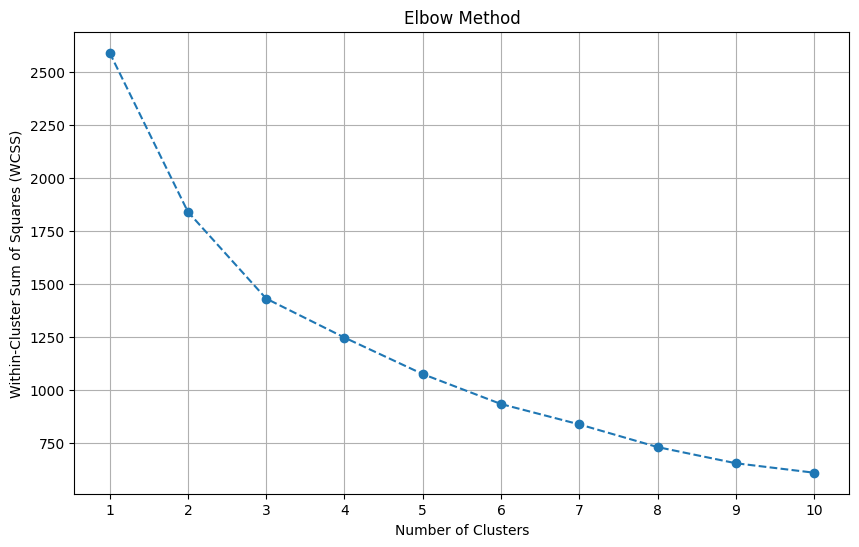

In [16]:
import matplotlib.pyplot as plt
# Drop the 'country' column before fitting KMeans
dfc = df.copy()
dfc.drop(columns=['country'], inplace=True)

# Calculate the within-cluster sum of squares for different values of k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dfc)
    wcss.append(kmeans.inertia_)

# Plot the within-cluster sum of squares vs. the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


In [18]:
# Importing the KMeans class
from sklearn.cluster import KMeans

# Creating a KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fitting the model to your data
kmeans.fit(dfc)

C:\Users\ruel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

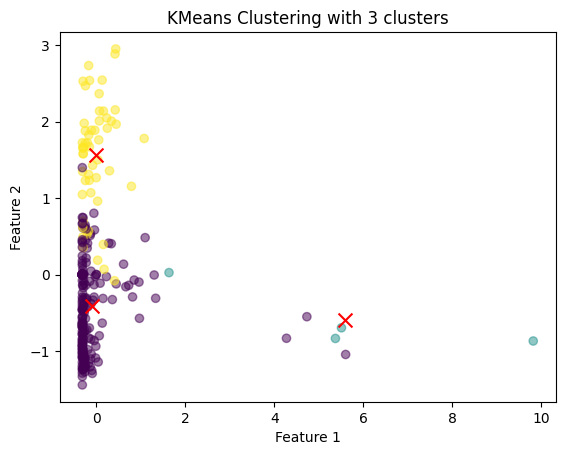

In [19]:
import matplotlib.pyplot as plt

# Extracting the cluster centers and labels from the trained model
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Plotting the data points with different colors for each cluster
plt.scatter(dfc.iloc[:, 0], dfc.iloc[:, 1], c=labels, cmap='viridis', alpha=0.5)

# Plotting the cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100)

# Adding labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering with 3 clusters')

# Displaying the plot
plt.show()


Based on the elbow method, K=3 appears to be a good choice for the number of clusters as it balances the trade-off between within-cluster sum of squares (WCSS) and the number of clusters.
<br>
**Reasonable Choices:**
<br>
K=3 shows a clear elbow point, indicating a good fit.
Other values like K=2 or K=4 might also be reasonable, depending on the specific application and desired granularity of clustering. <br>
**Features Defining Clusters:**
<br>
Features like 'area', 'birth_rate', 'death_rate', 'internet_users', 'life_exp_at_birth', and 'population' are likely contributing significantly to defining the clusters.<br>
These features provide distinct information about different aspects of the countries, such as demographic factors, internet penetration, and population metrics, helping to differentiate clusters effectively.<br>